# Eddys y Radionucleidos

**Objetivo:** Se pretende explorar la posible relación entre los radioisotopos de $^{137}Cs$ y $^{134}Cs$ con fenomenos de turbulencia en el Océano Ártico.

Los datos utilizados se han descargado de la base de datos 

<a href="https://maris.iaea.org/explore/type/1">Marine Radioactivity Information System</a>

## Introducción 
La contaminación de radionucleidos en el océano se debe primcipalmente a pruebas de armas atmosféricas, vertidos de combustible reprocesado de plantas nucleares y vertidos accidentales de plantas de enrgía nucleares de manera que es un tema de preocupación global observar su distribución temporal y espacial junto con su concetración.

Sin embargo, el $^{137}Cs$ es en la actualidad uno de  los trazadores más utiles de los procesos de dinámica oceánica como difusión y advección; Debido a que está muy bien caracterizado los eventos que han introducido dicho isótopo al ambiente marino y a que el $^{137}Cs$ se presenta en forma disuelta en el océano.

En 1970 un promedio de 30 PBq fueron liberados al oceano 
Atlantico debido a vertidos de combustible reprocesado de plantas nucleares incrementando de manera drastica la concentración $^{137}Cs$, alcanzando valores máximos de 204 kBq/m^3 en 1974 de hasta 

A partir de la década de 1970-79, los impactos de las descargas líquidas de las plantas de reprocesamiento de combustible nuclear fueron prominentes registrando 30 PBq de $^{137}Cs$ en el Océano Atlántico Norte y sus mares marginales del noreste y un máximo de 100.000 $Bq/m^3$ para 1970.


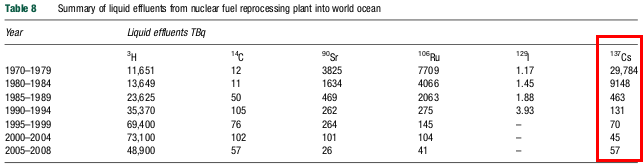

## Importamos Paquetes  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xarray as xr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dirpath = '/content/drive/MyDrive/ULPGC/Mesoescala/Radiactividad/'

Mounted at /content/drive


## **1.** Integración de Datos

En esta sección se van a selecionar las varaibles del dataset que se usarán para el proyecto, además se llevarán a un mismo sistema de unidades.

In [ ]:
df = pd.read_csv(dirpath+'137Cs_Data.csv')#, header=0, sep='\s{1,}', index_col=False)
df.head()

,MARIS sample ID,Sample type,Laboratory,Latitude (decimal),Longitude (decimal),Station ID,Data provider's sample ID,MARIS Profile ID,MARIS Transect ID,Sampling depth (m),...,Sampling method,Preparation method,Drying method,Counting method,MARIS reference ID,Reference/Citation,Zotero URL,Reference note,Sample note,Measurement note
0,319948,Seawater,Laboratory of Ion Beam Physics,84.502222,-138.318889,342,11,NaN,NaN,1000.0,...,Bottle sampling,NaN,NaN,NaN,190,"Schlitzer, R., Anderson, R.F., Dodas, E.M., Lo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,"BODC Station: 728306, Cruise: GIPY11, PRESSURE...",NaN
1,319922,Seawater,Laboratory of Ion Beam Physics,84.498056,36.093889,260,17,NaN,NaN,1500.2,...,Bottle sampling,NaN,NaN,NaN,190,"Schlitzer, R., Anderson, R.F., Dodas, E.M., Lo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,"BODC Station: 728188, Cruise: GIPY11, PRESSURE...",NaN
2,320114,Seawater,Laboratory of Ion Beam Physics,87.823611,-169.966944,328,14,NaN,NaN,500.4,...,Bottle sampling,NaN,NaN,NaN,190,"Schlitzer, R., Anderson, R.F., Dodas, E.M., Lo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,"BODC Station: 728282, Cruise: GIPY11, PRESSURE...",NaN
3,319926,Seawater,Laboratory of Ion Beam Physics,84.498056,36.093889,260,5,NaN,NaN,500.4,...,Bottle sampling,NaN,NaN,NaN,190,"Schlitzer, R., Anderson, R.F., Dodas, E.M., Lo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,"BODC Station: 728188, Cruise: GIPY11, PRESSURE...",NaN
4,319758,Seawater,Laboratory of Ion Beam Physics,81.215000,86.270278,279,1,NaN,NaN,318.9,...,Bottle sampling,NaN,NaN,NaN,190,"Schlitzer, R., Anderson, R.F., Dodas, E.M., Lo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,"BODC Station: 728068, Cruise: GIPY11, PRESSURE...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MARIS sample ID               3077 non-null   int64  
 1   Sample type                   3077 non-null   object 
 2   Laboratory                    3077 non-null   object 
 3   Latitude (decimal)            3077 non-null   float64
 4   Longitude (decimal)           3077 non-null   float64
 5   Station ID                    2912 non-null   object 
 6   Data provider's sample ID     2540 non-null   object 
 7   MARIS Profile ID              38 non-null     float64
 8   MARIS Transect ID             0 non-null      float64
 9   Sampling depth (m)            3077 non-null   float64
 10  Total depth (m)               1646 non-null   float64
 11  Sampling start datetime       3077 non-null   object 
 12  Sampling end datetime         0 non-null      float64
 13  Nuc

In [ ]:
vars = ['Nuclide','Latitude (decimal)', 'Longitude (decimal)', 'Sampling depth (m)', 
        'Sampling start datetime', 'Activity or MDA', 'Uncertainty', 'Unit', 
        'Salinity', 'Temperature [°C]']

In [ ]:
df = df[vars]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude (decimal),3077.0,70.312245,5.469464,60.150000,66.0000,70.983333,74.533333,87.823611
Longitude (decimal),3077.0,3.620901,27.740083,-169.966944,-2.0000,5.000000,13.269722,123.422778
Sampling depth (m),3077.0,209.082938,510.453230,0.000000,0.0000,3.000000,100.000000,4336.299800
Activity or MDA,2582.0,12.445754,17.169484,-0.273867,2.6425,6.380000,14.960000,144.000000
Uncertainty,1433.0,0.438428,1.540892,0.000000,0.1600,0.270000,0.401193,34.050000
Salinity,1513.0,34.482540,1.655861,8.600000,34.5000,34.908000,35.024000,35.500000
Temperature [°C],195.0,1.480758,2.577062,-2.000000,-0.5250,0.800000,2.900000,10.310000


In [ ]:
df

,Nuclide,Latitude (decimal),Longitude (decimal),Sampling depth (m),Sampling start datetime,Activity or MDA,Uncertainty,Unit,Salinity,Temperature [°C]
0,137Cs,84.502222,-138.318889,1000.0,2007-09-07 10:12:13,0.001083,0.000146,Bq/kg,34.901001,NaN
1,137Cs,84.498056,36.093889,1500.2,2007-08-07 18:43:13,0.000985,0.000029,Bq/kg,34.918999,NaN
2,137Cs,87.823611,-169.966944,500.4,2007-09-02 22:23:31,0.002615,0.000185,Bq/kg,34.868999,NaN
3,137Cs,84.498056,36.093889,500.4,2007-08-07 18:43:13,0.002127,0.000224,Bq/kg,34.942001,NaN
4,137Cs,81.215000,86.270278,318.9,2007-08-19 15:28:36,0.001883,0.000176,Bq/kg,34.862999,NaN
...,...,...,...,...,...,...,...,...,...,...
3072,137Cs,69.580000,-168.790000,50.0,2017-09-21 00:00:00,1.570000,0.200000,Bq/m3,NaN,NaN
3073,134Cs,68.810000,-168.910000,9.0,2017-09-22 00:00:00,0.100000,NaN,Bq/m3,NaN,NaN
3074,137Cs,68.810000,-168.910000,9.0,2017-09-22 00:00:00,1.700000,0.200000,Bq/m3,NaN,NaN
3075,134Cs,67.790000,-168.120000,9.0,2017-07-31 00:00:00,0.360000,NaN,Bq/m3,NaN,NaN


In [ ]:
df['Dates'] = pd.to_datetime(df['Sampling start datetime']).dt.date
df['Time'] = pd.to_datetime(df['Sampling start datetime']).dt.time
df = df.drop(columns=['Sampling start datetime'])
df

,Nuclide,Latitude (decimal),Longitude (decimal),Sampling depth (m),Activity or MDA,Uncertainty,Unit,Salinity,Temperature [°C],Dates,Time
0,137Cs,84.502222,-138.318889,1000.0,0.001083,0.000146,Bq/kg,34.901001,NaN,2007-09-07,10:12:13
1,137Cs,84.498056,36.093889,1500.2,0.000985,0.000029,Bq/kg,34.918999,NaN,2007-08-07,18:43:13
2,137Cs,87.823611,-169.966944,500.4,0.002615,0.000185,Bq/kg,34.868999,NaN,2007-09-02,22:23:31
3,137Cs,84.498056,36.093889,500.4,0.002127,0.000224,Bq/kg,34.942001,NaN,2007-08-07,18:43:13
4,137Cs,81.215000,86.270278,318.9,0.001883,0.000176,Bq/kg,34.862999,NaN,2007-08-19,15:28:36
...,...,...,...,...,...,...,...,...,...,...,...
3072,137Cs,69.580000,-168.790000,50.0,1.570000,0.200000,Bq/m3,NaN,NaN,2017-09-21,00:00:00
3073,134Cs,68.810000,-168.910000,9.0,0.100000,NaN,Bq/m3,NaN,NaN,2017-09-22,00:00:00
3074,137Cs,68.810000,-168.910000,9.0,1.700000,0.200000,Bq/m3,NaN,NaN,2017-09-22,00:00:00
3075,134Cs,67.790000,-168.120000,9.0,0.360000,NaN,Bq/m3,NaN,NaN,2017-07-31,00:00:00


In [ ]:
df['Unit'].unique()

array(['Bq/kg', 'Bq/m3', 'NOT AVAILABLE'], dtype=object)

`'NOT AVAILABLE'` Es por los datos de $^{137}Cs/^{134}Cs$



In [ ]:
ρ = 1026 #kg/m^3.

for id in range(df.shape[0]):
  if df['Unit'][id] == 'Bq/kg':
    df['Activity or MDA'][id] = df['Activity or MDA'][id]*ρ
    df['Unit'][id] = 'Bq/m3'

In [ ]:
df

,Nuclide,Latitude (decimal),Longitude (decimal),Sampling depth (m),Activity or MDA,Uncertainty,Unit,Salinity,Temperature [°C],Dates,Time
0,137Cs,84.502222,-138.318889,1000.0,1.111083,0.000146,Bq/m3,34.901001,NaN,2007-09-07,10:12:13
1,137Cs,84.498056,36.093889,1500.2,1.010985,0.000029,Bq/m3,34.918999,NaN,2007-08-07,18:43:13
2,137Cs,87.823611,-169.966944,500.4,2.682615,0.000185,Bq/m3,34.868999,NaN,2007-09-02,22:23:31
3,137Cs,84.498056,36.093889,500.4,2.182127,0.000224,Bq/m3,34.942001,NaN,2007-08-07,18:43:13
4,137Cs,81.215000,86.270278,318.9,1.931883,0.000176,Bq/m3,34.862999,NaN,2007-08-19,15:28:36
...,...,...,...,...,...,...,...,...,...,...,...
3072,137Cs,69.580000,-168.790000,50.0,1.570000,0.200000,Bq/m3,NaN,NaN,2017-09-21,00:00:00
3073,134Cs,68.810000,-168.910000,9.0,0.100000,NaN,Bq/m3,NaN,NaN,2017-09-22,00:00:00
3074,137Cs,68.810000,-168.910000,9.0,1.700000,0.200000,Bq/m3,NaN,NaN,2017-09-22,00:00:00
3075,134Cs,67.790000,-168.120000,9.0,0.360000,NaN,Bq/m3,NaN,NaN,2017-07-31,00:00:00


## **2.** Preparación de Datos
En esta sección se limpiarán los datos nulos y se agruparan según las varaibles de profundidad y tiempo.

In [ ]:
df.isna().sum() #Total valores null

Nuclide                   0
Latitude (decimal)        0
Longitude (decimal)       0
Sampling depth (m)        0
Activity or MDA         495
Uncertainty            1644
Unit                      0
Salinity               1564
Temperature [°C]       2882
Dates                     0
Time                      0
dtype: int64

In [ ]:
df = df.dropna(subset=['Activity or MDA'])
df.isna().sum()

Nuclide                   0
Latitude (decimal)        0
Longitude (decimal)       0
Sampling depth (m)        0
Activity or MDA           0
Uncertainty            1149
Unit                      0
Salinity               1557
Temperature [°C]       2387
Dates                     0
Time                      0
dtype: int64

In [ ]:
df['etiqueta'] = [f"{list(df['Activity or MDA'])[id]:.3f} {list(df['Unit'])[id]} {list(df['Nuclide'])[id]} {list(df['Dates'])[id]}" for id in range(df.shape[0])]

In [ ]:
dict_df_time = {}
dates_sort = [str(date) for date in pd.unique(sorted(df['Dates']))]
years_sorted = sorted(list(set([int(date.split("-")[0]) for date in dates_sort])))
for y in years_sorted:
  dict_df_time[f'df{y}'] = df[pd.to_datetime(df['Dates']).dt.year == y]

In [ ]:
dict_df_time.keys()

dict_keys(['df1972', 'df1974', 'df1978', 'df1979', 'df1980', 'df1981', 'df1982', 'df1983', 'df1984', 'df1985', 'df1987', 'df1988', 'df1990', 'df1991', 'df1992', 'df1995', 'df1996', 'df1997', 'df1998', 'df1999', 'df2000', 'df2001', 'df2002', 'df2003', 'df2004', 'df2005', 'df2006', 'df2007', 'df2008', 'df2009', 'df2010', 'df2011', 'df2012', 'df2013', 'df2014', 'df2015', 'df2016', 'df2017'])

In [ ]:
dict_df_depth = {}
depths = [0, 50] + list(range(100, 3900, 100))
for n, i in enumerate(depths):
  if i == depths[-1]:
    break
  if i == depths[1]:
    dict_df_depth['df0'] = df[(df['Sampling depth (m)'] == 0)]
  dict_df_depth[f'df{depths[n+1]}'] = df[(df['Sampling depth (m)'] > i) & (df['Sampling depth (m)'] < depths[n+1])]
  if dict_df_depth[f'df{depths[n+1]}']['Activity or MDA'].empty == True:
    del dict_df_depth[f'df{depths[n+1]}']

In [ ]:
new_depths = [int(key.split("f",1)[1]) for key in dict_df_depth.keys()]

In [ ]:
meadias_activity = [dict_df_depth[key]['Activity or MDA'].mean() for key in list(dict_df_depth.keys())]

Cuanto es la profundidad de influencia de un eddy?

toca convertir las actividades a las mismas unidades

In [ ]:
for key, year in zip(list(dict_df_time.keys()), years_sorted):
  dict_df_time[key]['group_year'] = [year]*dict_df_time[key].shape[0]

In [ ]:
for key, depth in zip(list(dict_df_depth.keys()), new_depths):
  dict_df_depth[key]['group_depth'] = [depth]*dict_df_depth[key].shape[0]

In [ ]:
df_nuevo_time = pd.concat([dict_df_time[key] for key in list(dict_df_time.keys())])

In [ ]:
df_nuevo = pd.concat([dict_df_depth[key] for key in list(dict_df_depth.keys())])
df_nuevo[df_nuevo['Nuclide']=='134Cs']

,Nuclide,Latitude (decimal),Longitude (decimal),Sampling depth (m),Activity or MDA,Uncertainty,Unit,Salinity,Temperature [°C],Dates,Time,etiqueta,group_depth
11,134Cs,74.980000,-160.210000,9.0,0.43,NaN,Bq/m3,NaN,NaN,2017-09-10,00:00:00,0.430 Bq/m3 134Cs 2017-09-10,50
13,134Cs,73.700000,-160.810000,9.0,0.36,NaN,Bq/m3,NaN,NaN,2017-08-01,00:00:00,0.360 Bq/m3 134Cs 2017-08-01,50
15,134Cs,71.810000,-163.000000,9.0,0.34,NaN,Bq/m3,NaN,NaN,2017-07-31,00:00:00,0.340 Bq/m3 134Cs 2017-07-31,50
28,134Cs,75.920000,-163.070000,9.0,0.37,NaN,Bq/m3,NaN,NaN,2017-08-02,00:00:00,0.370 Bq/m3 134Cs 2017-08-02,50
30,134Cs,74.800000,-159.460000,9.0,0.36,NaN,Bq/m3,NaN,NaN,2017-08-01,00:00:00,0.360 Bq/m3 134Cs 2017-08-01,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,134Cs,70.983333,-18.800000,750.0,0.70,NaN,Bq/m3,34.9,0.30,1988-09-13,00:00:00,0.700 Bq/m3 134Cs 1988-09-13,800
2323,134Cs,71.000000,-17.283333,803.0,0.48,NaN,Bq/m3,34.9,0.40,1988-09-12,00:00:00,0.480 Bq/m3 134Cs 1988-09-12,900
2233,134Cs,70.983333,-18.800000,1350.0,1.01,NaN,Bq/m3,34.9,0.80,1988-09-13,00:00:00,1.010 Bq/m3 134Cs 1988-09-13,1400
2273,134Cs,71.000000,-17.283333,1660.0,0.14,NaN,Bq/m3,34.9,0.80,1988-09-12,00:00:00,0.140 Bq/m3 134Cs 1988-09-12,1700


## **3.** Entendimiento de los datos

In [ ]:
import plotly.graph_objects as go

In [ ]:
def plot_map_points(df, lat_name, lon_name, etiqueta, var_name, Titulo, isotopo, year):
  """
  Esta funcion crea una vista geografica interactiva de los datos
  """
  isotopo = isotopo
  if isotopo == '137Cs/134Cs':
    df = df[df['Nuclide']=='137Cs/134Cs']

  elif isotopo == '137Cs':
    df = df[df['Nuclide']=='137Cs']

  elif isotopo == '134Cs':
      df = df[df['Nuclide']=='134Cs']
  else: 
    df = df
  if year!='all':
    df = df[pd.to_datetime(df['Dates']).dt.year == int(year)]
  else:
    df = df
  #ajusta los parametros de los datos
  data = go.Scattergeo(lat = df[lat_name], lon = df[lon_name], #coordenadas de lso datos
                       text = df[etiqueta] , #etiquetas de los datos
                       marker = dict(color = df[var_name], #color de los puntos
                                     reversescale = True, opacity = 0.7, size = 7,
                                     colorscale = 'Inferno', 
                                     cmin = df[var_name].min(), 
                                     cmax = df[var_name].max(),
                                     colorbar_title = var_name)) #tamaño y tranparencia
  #layout= son los parametros del marco frame
  #geo= ajusta parametros cartograficos
  lonmax = 123.42 #df[lon_name].max()
  lonmin = -169.96 #df[lon_name].min()
  latmax = 87.82 #df[lat_name].max()
  latmin = 60.15 #df[lat_name].min()

  layout = dict(title = dict(text = Titulo),
                xaxis= dict(title_text='longitud'),
                geo = dict(scope = 'world', showland = True, landcolor = "rgb(212, 212, 212)", #color de la tierra
                           subunitcolor = "rgb(255, 255, 255)", countrycolor = "rgb(255, 255, 255)", #color de los bordes paises
                           showlakes = True, lakecolor = "rgb(255, 255, 255)", showsubunits = True, #color de los lagor
                           showcountries = True, resolution = 50, showocean = True, oceancolor = '#79C8E5', #color del océano
                           projection = dict(type = 'orthographic', rotation_lat = 100), #tipo de proyeccion y centrado en 20° por rotación
                           lonaxis = dict(showgrid = True, gridwidth = 0.5, range=[lonmin , lonmax ], dtick = 5), #rango de visulización long
                           lataxis = dict(showgrid = True, gridwidth = 0.5,  range=[latmin+2, latmax+25], dtick = 5))) #rango de visulización lat
                           # antes de definir el range de lonaixs debe definir bien el rotation_lon
  mapa = go.Figure(data = data, layout= layout).update_layout(height=600)
  
  mapa.show()

In [ ]:
def map_dict(depth, isotopo, year):
  return plot_map_points(dict_df_depth[f'df{depth}'], lat_name='Latitude (decimal)',
                         lon_name='Longitude (decimal)', etiqueta='etiqueta', var_name='Activity or MDA', 
                         Titulo=f'Cs {isotopo} Artico {depth} m {year}', 
                         isotopo=isotopo, year=year)


In [ ]:
years_sorted.insert(0, 'all')

In [ ]:
from ipywidgets import interact
year = years_sorted
interact(map_dict, depth=new_depths, 
         isotopo=['Total', '137Cs', '134Cs', '137Cs/134Cs'],
         year=year)

interactive(children=(Dropdown(description='depth', options=(50, 0, 100, 200, 300, 400, 500, 600, 700, 800, 90…

<function __main__.map_dict>

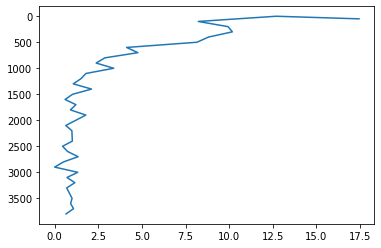

In [ ]:
plt.plot(meadias_activity, new_depths)
plt.gca().invert_yaxis()

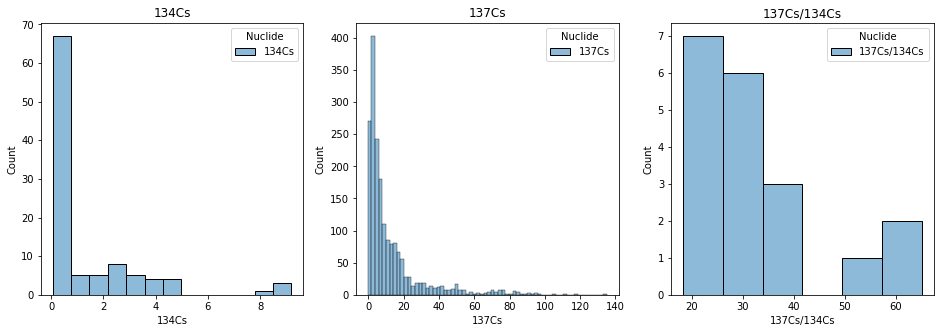

In [ ]:
#  Categorical Data
nucle = ['134Cs', '137Cs', '137Cs/134Cs']

#  Categorical Data
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,5))

for nu in nucle:
    plt.subplot(a, b, c)
    plt.title(f'{nu}')
    plt.xlabel(nu)
    sns.histplot(data=df_nuevo[df_nuevo['Nuclide']==nu], 
                 x="Activity or MDA", hue="Nuclide")
    c = c + 1
plt.show()

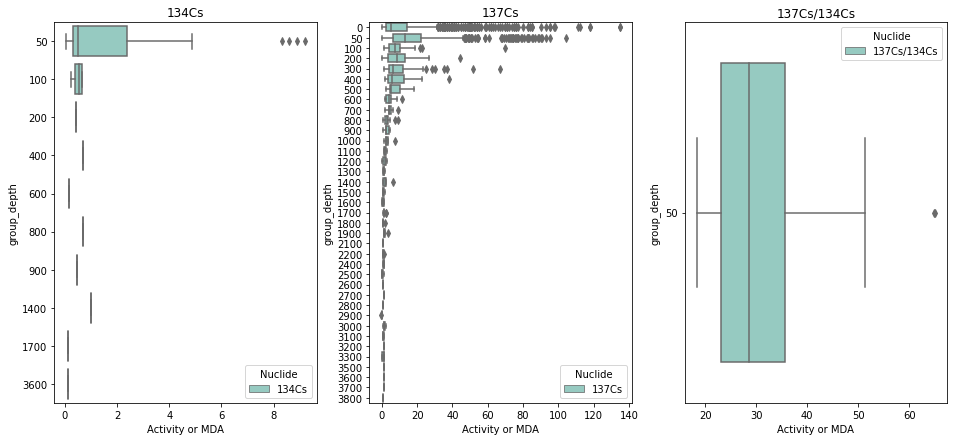

In [ ]:
#  Categorical Data
nucle = ['134Cs', '137Cs', '137Cs/134Cs']

#  Categorical Data
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,7))

for nu in nucle:
    plt.subplot(a, b, c)
    plt.title(f'{nu}')
    plt.xlabel(nu)
    sns.boxplot(x="Activity or MDA", y="group_depth", hue="Nuclide",
                 data=df_nuevo[df_nuevo['Nuclide']==nu], 
                 palette="Set3", orient="h")
    c = c + 1
plt.show()

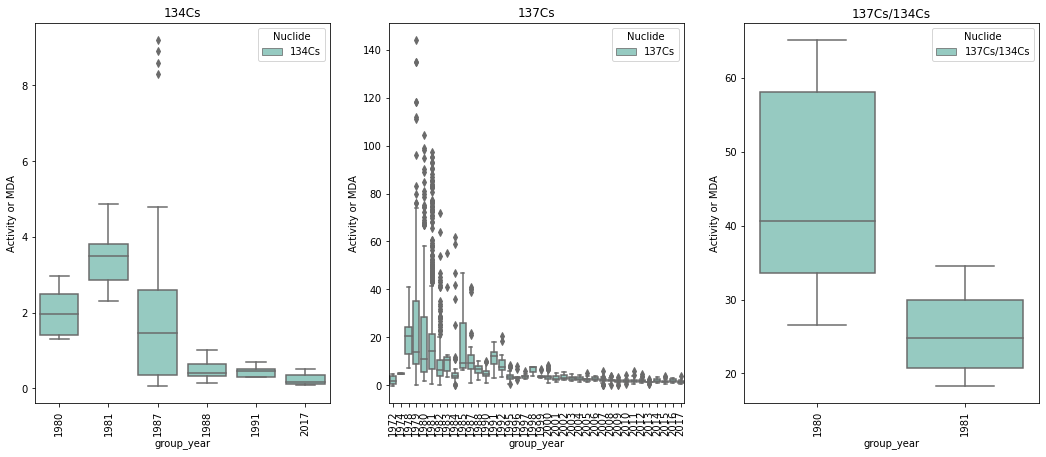

In [ ]:
#  Categorical Data
nucle = ['134Cs', '137Cs', '137Cs/134Cs']

#  Categorical Data
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,7))

for nu in nucle:
    plt.subplot(a, b, c)
    plt.title(f'{nu}')
    plt.xlabel(nu)
    sns.boxplot(x="group_year", y="Activity or MDA", hue="Nuclide",
                 data=df_nuevo_time[df_nuevo_time['Nuclide']==nu], 
                 palette="Set3")
    plt.xticks(rotation=90)
    c = c + 1
plt.show()

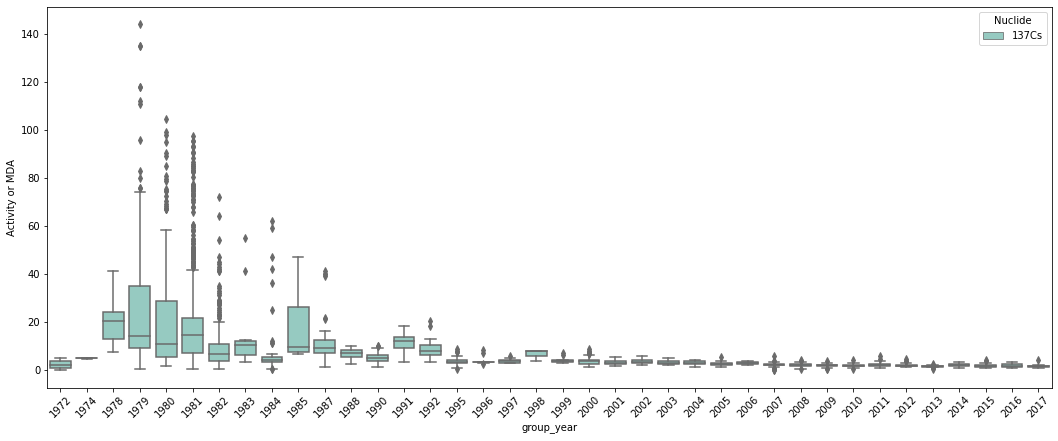

In [ ]:
fig = plt.figure(figsize=(18,7))
sns.boxplot(x="group_year", y="Activity or MDA", hue="Nuclide",
                 data=df_nuevo_time[df_nuevo_time['Nuclide']=='137Cs'], 
                 palette="Set3")
plt.xticks(rotation=45);

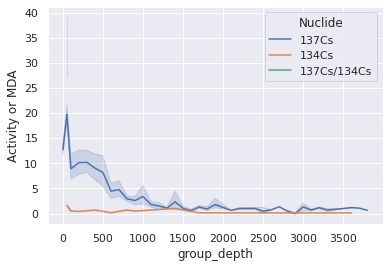

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="group_depth", y="Activity or MDA", hue="Nuclide",
             data=df_nuevo)

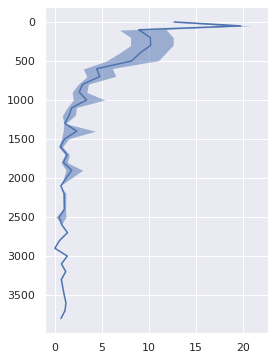

In [ ]:
plt.figure(figsize=(4,6))
seriee = 0
ax = sns.lineplot(x="group_depth", y="Activity or MDA", hue="Nuclide",
             data=df_nuevo)
#get the line and the shape from the tsplot
x,y =ax.lines[seriee].get_data()
c = ax.collections[seriee].get_paths()[0].vertices
# discart the tsplot
ax.clear()

# create new plot on the axes, inverting x and y
ax.fill_between(c[:,1], c[:,0], alpha=0.5)
ax.plot(y,x)
ax.invert_yaxis()
plt.show()

In [ ]:
df_nuevo_time

,Nuclide,Latitude (decimal),Longitude (decimal),Sampling depth (m),Activity or MDA,Uncertainty,Unit,Salinity,Temperature [°C],Dates,Time,etiqueta,group_year
74,137Cs,64.166667,-5.60,247.0,4.492926,0.153750,Bq/m3,34.918,3.63,1972-08-25,00:00:00,4.493 Bq/m3 137Cs 1972-08-25,1972
122,137Cs,64.166667,-5.60,4.0,3.741257,0.102500,Bq/m3,35.045,10.31,1972-08-25,00:00:00,3.741 Bq/m3 137Cs 1972-08-25,1972
239,137Cs,64.166667,-5.60,558.0,4.475842,0.187917,Bq/m3,34.997,1.44,1972-08-25,00:00:00,4.476 Bq/m3 137Cs 1972-08-25,1972
269,137Cs,64.166667,-5.60,66.0,4.356259,0.153750,Bq/m3,35.146,6.82,1972-08-25,00:00:00,4.356 Bq/m3 137Cs 1972-08-25,1972
311,137Cs,64.166667,-5.60,1532.0,0.222084,0.153750,Bq/m3,34.917,-0.86,1972-08-25,00:00:00,0.222 Bq/m3 137Cs 1972-08-25,1972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,137Cs,69.580000,-168.79,50.0,1.570000,0.200000,Bq/m3,NaN,NaN,2017-09-21,00:00:00,1.570 Bq/m3 137Cs 2017-09-21,2017
3073,134Cs,68.810000,-168.91,9.0,0.100000,NaN,Bq/m3,NaN,NaN,2017-09-22,00:00:00,0.100 Bq/m3 134Cs 2017-09-22,2017
3074,137Cs,68.810000,-168.91,9.0,1.700000,0.200000,Bq/m3,NaN,NaN,2017-09-22,00:00:00,1.700 Bq/m3 137Cs 2017-09-22,2017
3075,134Cs,67.790000,-168.12,9.0,0.360000,NaN,Bq/m3,NaN,NaN,2017-07-31,00:00:00,0.360 Bq/m3 134Cs 2017-07-31,2017


In [ ]:
df_time_500 = df_nuevo_time[(df_nuevo_time['Sampling depth (m)'] > 50) & (df_nuevo_time['Sampling depth (m)'] < 500)]
df_time_500

,Nuclide,Latitude (decimal),Longitude (decimal),Sampling depth (m),Activity or MDA,Uncertainty,Unit,Salinity,Temperature [°C],Dates,Time,etiqueta,group_year
74,137Cs,64.166667,-5.600000,247.0,4.492926,0.153750,Bq/m3,34.918,3.63,1972-08-25,00:00:00,4.493 Bq/m3 137Cs 1972-08-25,1972
269,137Cs,64.166667,-5.600000,66.0,4.356259,0.153750,Bq/m3,35.146,6.82,1972-08-25,00:00:00,4.356 Bq/m3 137Cs 1972-08-25,1972
753,137Cs,70.000000,-0.016667,250.0,3.724174,0.205000,Bq/m3,35.116,NaN,1972-08-22,00:00:00,3.724 Bq/m3 137Cs 1972-08-22,1972
769,137Cs,64.166667,-5.600000,349.0,4.663759,0.239167,Bq/m3,34.931,2.02,1972-08-25,00:00:00,4.664 Bq/m3 137Cs 1972-08-25,1972
770,137Cs,64.166667,-5.600000,458.0,4.715009,0.170834,Bq/m3,35.014,1.87,1972-08-25,00:00:00,4.715 Bq/m3 137Cs 1972-08-25,1972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,137Cs,64.403056,7.863889,233.0,1.222943,0.099352,Bq/m3,NaN,NaN,2014-06-12,00:00:00,1.223 Bq/m3 137Cs 2014-06-12,2014
303,137Cs,63.457778,10.829722,88.0,2.800000,0.250000,Bq/m3,NaN,NaN,2016-10-22,00:00:00,2.800 Bq/m3 137Cs 2016-10-22,2016
343,137Cs,64.457500,11.419444,281.0,3.200000,0.250000,Bq/m3,NaN,NaN,2016-10-21,00:00:00,3.200 Bq/m3 137Cs 2016-10-21,2016
2413,137Cs,65.914167,13.106389,447.0,2.800000,0.250000,Bq/m3,NaN,NaN,2016-10-19,00:00:00,2.800 Bq/m3 137Cs 2016-10-19,2016


In [ ]:
df_time_500.groupby('group_year').count().shape

(22, 12)

In [ ]:
import plotly.express as px
px.histogram(df_time_500, x='group_year', text_auto=True, nbins=51)


En el histograma se observa que el año que tiene la mayor cantidad para las profundidades de interes (100 - 500 m) es 1981.

Pero Copernicus sólo tiene datos desde 1993, por 2007 es el siguiente año con más datos posterior a 1993.

## Sea Surface Height Anomaly

In [ ]:
df_time_500['Dates'] = [str(i) for i in df_time_500['Dates']]

In [ ]:
!python -m pip install motuclient==1.8.4 --no-cache-dir  

In [ ]:
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service SEALEVEL_GLO_PHY_L4_MY_008_047-TDS --product cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D --longitude-min -44.42991155500115 --longitude-max 175.47117576306755 --latitude-min 53.99818046659747 --latitude-max 83.33556547838026 --date-min "2007-01-01 00:00:00" --date-max "2007-12-31 23:59:59" --variable sla --out-dir "/content" --out-name "sla_2007.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"

2022-03-25 01:47:26.906 [ INFO] Asynchronous mode set
2022-03-25 01:47:26.907 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-25 01:47:30.121 [ INFO] Requesting file to download (this can take a while)...
2022-03-25 01:47:36.730 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-25 01:47:46.172 [ INFO] The product is ready for download
2022-03-25 01:47:46.172 [ INFO] Downloading file (this can take a while)...
2022-03-25 01:47:47.078 [ INFO] File type: application/x-netcdf
2022-03-25 01:47:47.079 [ INFO] File size: 305.8 MB (305792932 B)
2022-03-25 01:47:47.079 [ INFO] Downloading file /content/sla_2007.nc
2022-03-25 01:47:48.199 [ INFO] - 305.8 MB (1.0%)
2022-03-25 01:47:48.516 [ INFO] - 305.8 MB (2.0%)
2022-03-25 01:47:48.680 [ INFO] - 305.8 MB (3.0%)
2022-03-25 01:47:48.995 [ INFO] - 305.8 MB (4.0%)
2022-03-25 01:47:49.158 [ INFO] - 305.8 MB (5.0%)
2022-03-25 01:47:49.472 [ INFO] - 305

In [ ]:
ds_sla_2007 = xr.open_dataset("sla_2007.nc")
ds_sla_2007

<xarray.Dataset>
Dimensions:    (latitude: 119, longitude: 880, time: 365)
Coordinates:
  * latitude   (latitude) float32 53.88 54.12 54.38 54.62 ... 82.88 83.12 83.38
  * time       (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2007-12-31
  * longitude  (longitude) float32 -44.38 -44.12 -43.88 ... 174.9 175.1 175.4
Data variables:
    crs        int32 ...
    sla        (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2021-08-02T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2021-08-01T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

Los datos de altura superficial del mar tienen una resolución de 12 km.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install --no-binary shapely shapely --force
!pip install cartopy

  Using cached Shapely-1.8.1.post1.tar.gz (198 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.1.post1-cp37-cp37m-linux_x86_64.whl size=665640 sha256=0180685a8842f27eaa40834eb89e0320f5c9f8a09c41aa2d6c569e72160a4f9b
  Stored in directory: /root/.cache/pip/wheels/ea/8d/2f/ab748b8a432b3c6cd72e751b3bca17c5a9ed4538b1e78467e6
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.1.post1
    Uninstalling Shapely-1.8.1.post1:
      Successfully uninstalled Shapely-1.8.1.post1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


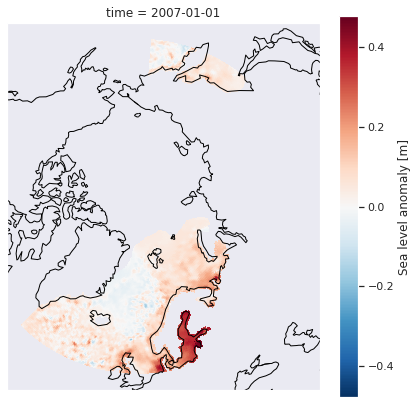

In [ ]:
import cartopy.crs as ccrs
map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0, globe=None);
fig = plt.figure(figsize=(7, 7))
fig.add_subplot(1,1,1, projection=map_proj)
ds_sla_2007.sla.sel(time='2007-01-01', method='nearest').plot(transform=ccrs.PlateCarree()).axes.coastlines();

In [ ]:
#Extra los datos de sla del Dataset y los coloca el el DF de 2007
df_sla_2007 = df_time_500[df_time_500['group_year']==2007]
arr_2007 = df_time_500[df_time_500['group_year']==2007]['Dates'].unique()
arr_2007 = [str(date) for date in arr_2007]
df_sla_2007['sla'] = [0]*df_sla_2007.shape[0]

for date in arr_2007:
  df_date = df_time_500[df_time_500['Dates']==date]
  sr_lat = df_date['Latitude (decimal)']
  sr_lon = df_date['Longitude (decimal)']
  sr_depth = df_date['Sampling depth (m)']

  for lat, lon, depth in zip(sr_lat, sr_lon, sr_depth):
    sla = ds_sla_2007.sla.sel(latitude=lat, longitude=lon, time= date, method='nearest')
    condition_lat = (df_sla_2007['Latitude (decimal)']== lat)
    condition_lon = (df_sla_2007['Longitude (decimal)']== lon)
    condition_depth = (df_date['Sampling depth (m)']== depth)
    idx = df_sla_2007[condition_lat & condition_lon & condition_depth].index.values.astype(int)[0]
    df_sla_2007.loc[idx,'sla']=sla

In [ ]:
df_sla_2007

,Nuclide,Latitude (decimal),Longitude (decimal),Sampling depth (m),Activity or MDA,Uncertainty,Unit,Salinity,Temperature [°C],Dates,Time,etiqueta,group_year,sla
4,137Cs,81.215000,86.270278,318.9,1.931883,0.000176,Bq/m3,34.862999,NaN,2007-08-19,15:28:36,1.932 Bq/m3 137Cs 2007-08-19,2007,0.0436
7,137Cs,84.498056,36.093889,75.4,2.422361,0.000371,Bq/m3,34.206001,NaN,2007-08-07,18:43:13,2.422 Bq/m3 137Cs 2007-08-07,2007,0.0353
8,137Cs,84.502222,-138.318889,75.4,1.101073,0.000234,Bq/m3,31.677000,NaN,2007-09-07,10:12:13,1.101 Bq/m3 137Cs 2007-09-07,2007,NaN
20,137Cs,84.502222,-138.318889,201.9,5.775629,0.000302,Bq/m3,34.403000,NaN,2007-09-07,10:12:13,5.776 Bq/m3 137Cs 2007-09-07,2007,NaN
21,137Cs,82.090000,68.962778,100.0,2.392332,0.000224,Bq/m3,34.791000,NaN,2007-08-17,05:59:37,2.392 Bq/m3 137Cs 2007-08-17,2007,0.0455
32,137Cs,87.823611,-169.966944,75.1,2.492429,0.000205,Bq/m3,33.028999,NaN,2007-09-02,22:23:31,2.492 Bq/m3 137Cs 2007-09-02,2007,NaN
33,137Cs,82.090000,68.962778,195.0,1.631590,0.000263,Bq/m3,34.945000,NaN,2007-08-17,05:59:37,1.632 Bq/m3 137Cs 2007-08-17,2007,0.0455
34,137Cs,84.498056,36.093889,125.6,2.502439,0.000293,Bq/m3,34.431999,NaN,2007-08-07,18:43:13,2.502 Bq/m3 137Cs 2007-08-07,2007,0.0353
46,137Cs,87.823611,-169.966944,125.1,3.573483,0.000244,Bq/m3,34.247002,NaN,2007-09-02,22:23:31,3.573 Bq/m3 137Cs 2007-09-02,2007,NaN
47,137Cs,87.669722,111.731944,368.6,2.602537,0.000234,Bq/m3,34.881001,NaN,2007-08-28,23:43:23,2.603 Bq/m3 137Cs 2007-08-28,2007,NaN


In [ ]:
df_sla_2007.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude (decimal),31.0,81.257608,4.942402,67.583333,77.503056,82.090000,84.500139,87.823611
Longitude (decimal),31.0,21.286308,93.862875,-169.966944,22.875000,36.093889,77.616528,123.422778
Sampling depth (m),31.0,192.725806,121.666048,50.100000,92.550000,150.500000,300.250000,443.000000
Activity or MDA,31.0,2.274900,0.932485,0.000000,1.801756,2.300000,2.457395,5.775629
Uncertainty,31.0,0.022630,0.074308,0.000137,0.000205,0.000244,0.000268,0.345000
Salinity,28.0,34.502643,0.691361,31.677000,34.378250,34.799499,34.868249,34.967999
Temperature [°C],0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group_year,31.0,2007.000000,0.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
sla,23.0,0.028326,0.015552,0.004500,0.016900,0.030600,0.043600,0.051900


Las anomalías positivas corresponden a remolinos anticiclónicos

In [ ]:
import plotly.express as px
px.histogram(df_sla_2007, x='sla', text_auto=True, nbins=51)


In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(df_sla_2007, y="sla", points="all", notched=True)
fig.show()

In [ ]:
def sorted_date(list_dates:list):
  """
  A partir de una lista de fechas tipo str retorna una lista str de las fechas ordenadas
  """
  str2date = pd.to_datetime(list_dates)
  sorted_dates = [str(date).split(" ")[0] for date in sorted(str2date)]
  return sorted_dates

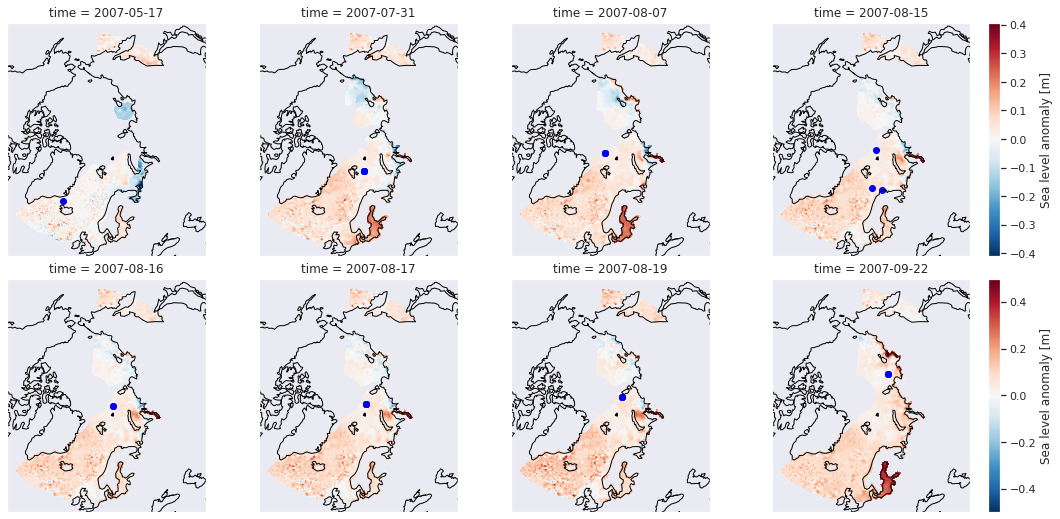

In [ ]:
import cartopy.crs as ccrs

#  Categorical Data
a = 2  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,9))
date_plot_iter = df_sla_2007.groupby('Dates').sum().index.values
date_plot_iter = list(set(date_plot_iter)-set(['2007-08-28', '2007-09-02', '2007-09-07']))
date_plot_iter = sorted_date(date_plot_iter)

map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0, globe=None)

for date in date_plot_iter:
    plt.subplot(a, b, c, projection=map_proj)
    ds_sla_2007.sla.sel(time=date, method='nearest').plot(
                                                          transform=ccrs.PlateCarree(), 
                                                          #subplot_kws={"projection": map_proj}, 
                                                          add_colorbar=False
                                                          ).axes.coastlines()
    if c <= 4:
      ds_sla_2007.sla.sel(time=date, method='nearest').plot(add_colorbar=False).axes.get_xaxis().set_visible(False)
    if c != 1 and c != 5:
      ds_sla_2007.sla.sel(time=date, method='nearest').plot(add_colorbar=False).axes.get_yaxis().set_visible(False)
    if c%4 == 0 or c%8 == 0:
      ds_sla_2007.sla.sel(time=date, method='nearest').plot(add_colorbar=True)
    
    condition_date = df_sla_2007['Dates'] == date
    for row in df_sla_2007[['Latitude (decimal)', 'Longitude (decimal)']][condition_date].iterrows():
      y = row[1]['Latitude (decimal)'] 
      x = row[1]['Longitude (decimal)']
      plt.scatter(x,y, color = 'blue', transform=ccrs.PlateCarree())
    c = c + 1
fig.subplots_adjust(wspace=-0.3, hspace=0.1)
plt.savefig('SLA_activity_2007.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def map_plot_xr(df, darr, date):
  map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0, globe=None);
  fig = plt.figure(figsize=(10, 10))
  fig.add_subplot(1,1,1, projection=map_proj)
  darr.sel(time=date, method='nearest').plot(transform=ccrs.PlateCarree()).axes.coastlines();
  condition_date = df['Dates'] == date
  df_latlon = df[['Latitude (decimal)', 'Longitude (decimal)']][condition_date]
  y = df_latlon['Latitude (decimal)'] 
  x = df_latlon['Longitude (decimal)']
  plt.scatter(x,y, color = 'blue', transform=ccrs.PlateCarree())

In [ ]:
from ipywidgets import interact
def map_plot_xr_interact(date):
  map_plot_xr(df_sla_2007, ds_sla_2007.sla, date)

interact(map_plot_xr_interact, date = date_plot_iter)

interactive(children=(Dropdown(description='date', options=('2007-05-17', '2007-07-31', '2007-08-07', '2007-08…

<function __main__.map_plot_xr_interact>

In [ ]:
def perfil_activ(sla):
  plt.figure(figsize=(4,6))
  condition_sla = df_sla_2007['sla'] == sla
  df_sla_2007[condition_sla]
  ax = sns.lineplot(x="Sampling depth (m)", y="Activity or MDA", hue="Nuclide",
              data=df_sla_2007[condition_sla])
  #get the line and the shape from the tsplot
  x,y =ax.lines[seriee].get_data()

  # discart the tsplot
  ax.clear()

  # create new plot on the axes, inverting x and y
  ax.plot(y,x)
  fecha = pd.unique(df_sla_2007[condition_sla]['Dates'])[0]
  ax.set_title(f'Perfil {fecha}')
  ax.set_ylabel('Profundidad (m)')
  ax.set_xlabel(f'Actividad específica ($Bq/m^3$) sla:{sla}')
  ax.invert_yaxis()
  plt.show()

In [ ]:
interact(perfil_activ, sla = np.sort(pd.unique(df_sla_2007['sla'])))

interactive(children=(Dropdown(description='sla', options=(0.0045000000000000005, 0.0151, 0.016900000000000002…

<function __main__.perfil_activ>

## Referencias

* IAEA MARIS, 2022. IAEA Marine Radioactivity Information System. In: Division of IAEA Environment Laboratories [online]. Monaco. [12-03-2022] https://maris.iaea.org